<div class="usecase-title">Melbourne Liveability Assessment</div>

<div class="usecase-authors"><b>Authored by: </b> Steven Nguyen</div>

<div class="usecase-duration"><b>Duration:</b> 120 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Beginner</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Pandas, Data Wrangling, Matplotlib, Seaborn, Linear regression</div>
</div>

<div class="usecase-section-header">Scenario</div>

**As a council it is important that we're focusing on our residents and ensuring that the City of Melbourne continues to have a high liveability. As such, we are dedicated to looking at the trends in our liveability and reflecting on why certain trends have decreased and why. We endeavour to ensure we know how our liveability is trending and find resolutions to why they are decreasing.**

This project will endeavour to highlight key trends for the City of Melbourne in regards to liveability and ensure that COM remains a highly liveable city and continues to retain its high ranking for liveability internationally. Downwards trends will be further investigated to potentially highlight areas that could be remedied and thus prevent further downwards trend. This will be achieved through looking at COM's *Indicators of Wellbeing by Year* and *Liveability and Social Indicators* datasets.

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
<ul>
    <li>Learn how to import the datasets into a Pandas dataframe</li>
    <li>Data wrangling with any columns not required and aggregating data</li>
    <li>Learn how to visualise by utilising libraries such as Matplotlib and Seaborn</li>
    <li>Learn how to create regression models and plot them</li>
</ul>

<h1><div class="usecase-section-header">Introduction</div></h1>

Historically, Melbourne enjoyed the distinction of occupying the foremost position in the Global Liveability Ranking until the year 2018. Nevertheless, in the subsequent years, the city has encountered noteworthy challenges in its quest to regain this prestigious ranking. This particular use case is centered on a comprehensive examination of the dynamic trends pertaining to liveability within Melbourne. Our primary aim is to discern and elucidate the determinants that have hindered Melbourne's endeavor to recapture the coveted number one position in the Global Liveability Ranking.

Our analysis will focus on pivotal domains that significantly contribute to the overall liveability score, encompassing areas such as employment opportunities, food security, acesss to healthcare, safety and security, as well as access to natural amenities. Furthermore, we will delve into the perspectives of Melbourne's residents, seeking insights through the Wellness Survey as an indicator. By juxtaposing these subjective views with objective metrics like the Jobs-to-Housing ratio, we intend to gain a nuanced understanding of the facets of liveability that warrant attention and potential enhancement.

**Datasets List**
<ol>
<li>Indicators of Wellbeing by Year Future Melbourne</li>
<li>City of Melbourne Liveability and Social Indicators</li>
</ol>

**Contents**
<ol>
<li>Import libraries</li>
<li>Analysis</li>
2.1. Jobs <br>
2.2. Healthcare<br>
2.3. Food Security<br>
2.4. Community Connectedness<br>
2.5. Safety<br>
2.6. Dwelling Density<br>
<li>Conclusion & Recommendations</li>
</ol>

Firstly, we'll import the necessary packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats
import datetime as dt
plt.style.use('ggplot')


We'll then be importing the 2 datasets that we'll be looking at.
1. Indicators of Wellbeing by Year Future Melbourne
2. City of Melbourne Liveability and Social Indicators

In [3]:
#https://data.melbourne.vic.gov.au/explore/dataset/indicators-of-wellbeing-by-year-future-melbourne/table/
ind_wellbeing = pd.read_csv("https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/indicators-of-wellbeing-by-year-future-melbourne/exports/csv?delimiter=%3B&list_separator=%2C&quote_all=false&with_bom=true",delimiter=";")

#https://data.melbourne.vic.gov.au/explore/dataset/city-of-melbourne-liveability-and-social-indicators/information/
liveability_df = pd.read_csv("https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/city-of-melbourne-liveability-and-social-indicators/exports/csv?delimiter=%3B&list_separator=%2C&quote_all=false&with_bom=true",delimiter=";")

Let us briefly look into both datasets to get a general understanding of them

In [4]:
#print the head of the dataframe indicators of wellbeing dataset 
ind_wellbeing.head()

,indicator_label,indicator_description,unit,2012,2013,2014,2015,2016,population,source
0,Quality of life,Personal subjective wellbeing Index (average o...,%,75.6,76.7,76.8,76.9,76.5,Resident,Future Melbourne Social Survey
1,Quality of life (Male),Personal subjective wellbeing Index (average o...,%,75.6,76.7,77.4,76.6,75.9,Resident,Future Melbourne Social Survey
2,Quality of life (18-35 yrs),Personal subjective wellbeing Index (average o...,%,75.6,74.9,76.9,76.1,76.3,Resident,Future Melbourne Social Survey
3,Quality of life (36 yrs and over),Personal subjective wellbeing Index (average o...,%,75.5,78.3,76.8,77.6,76.6,Resident,Future Melbourne Social Survey
4,Personal relationships,How satisfied people feel with their personal ...,%,77.0,79.8,80.0,78.9,79.5,Resident,Future Melbourne Social Survey


In [5]:
#print the columns names for the dataframe indicators of wellbeing dataset 
ind_wellbeing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   indicator_label        88 non-null     object 
 1   indicator_description  88 non-null     object 
 2   unit                   88 non-null     object 
 3   2012                   65 non-null     float64
 4   2013                   65 non-null     float64
 5   2014                   88 non-null     float64
 6   2015                   88 non-null     float64
 7   2016                   88 non-null     float64
 8   population             88 non-null     object 
 9   source                 88 non-null     object 
dtypes: float64(5), object(5)
memory usage: 7.0+ KB


In [6]:
#print the head of the dataframe for the Liveability and Social indicator dataset
liveability_df.head()

,type,topic,id,indicator,period,numerator,denominator,value,value_type,sources
0,Liveability,Economy,ECO_1,City's unemployment rate,2015 (June Qtr),"3,942","84,942",4.64,Percentage,Australian Government Department of Employment...
1,Liveability,Economy,ECO_2,Assessed value of commercial and industrial pr...,2015 (at 30 June),"48,331,069,777.00","101,671,404,180.00",47.54,Percentage,"City of Melbourne, Property Services, 2015-2018"
2,Liveability,Economy,ECO_3,Percentage of city population living in poverty,2015,"13,177","136,872",9.63,Percentage,"Geografia, Relative Poverty and Employment Mea..."
3,Liveability,Economy,ECO_4,Percentage of persons (city population) in ful...,2017 (June Qtr),"68,722","159,141",43.18,Percentage,"Geografia, Relative Poverty and Employment Mea..."
4,Liveability,Economy,ECO_4,Percentage of persons (city population) in ful...,2014 (June Qtr),"55,359","127,975",43.26,Percentage,"Geografia, Relative Poverty and Employment Mea..."


In [7]:
#print the column names of the dataframe for the Liveability and Social indicator dataset
liveability_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   type         319 non-null    object 
 1   topic        319 non-null    object 
 2   id           319 non-null    object 
 3   indicator    319 non-null    object 
 4   period       319 non-null    object 
 5   numerator    217 non-null    object 
 6   denominator  294 non-null    object 
 7   value        318 non-null    float64
 8   value_type   319 non-null    object 
 9   sources      319 non-null    object 
dtypes: float64(1), object(9)
memory usage: 25.0+ KB


Now let's create some custom functions that will be used later to clean our dataframe

In [8]:
def remove_qtr(indicator):
    # Use the apply method to apply the extraction function to the specified column
    indicator['period'] = indicator['period'].apply(lambda x: x.replace("(June Qtr)", "").strip())
    indicator['period'] = pd.to_datetime(indicator['period'], format='%Y')
    return indicator

def remove_30june(indicator):
    # Use the apply method to apply the extraction function to the specified column
    indicator['period'] = indicator['period'].apply(lambda x: x.replace("(at 30 June)", "").strip())
    indicator['period'] = pd.to_datetime(indicator['period'], format='%Y')
    return indicator

def remove_yr(indicator):
    indicator['period'] = indicator['period'].str.replace(r'\/\d{2}', '', regex=True)
    indicator['period'] = pd.to_datetime(indicator['period'], format='%Y')
    return indicator

def remove_FY(indicator):
    # Use str.replace to remove "FY " and "/15" and store the result in a new column
    indicator['period'] = indicator['period'].str.replace('FY |\/\d+', '',regex=True)
    indicator['period'] = pd.to_datetime(indicator['period'], format='%Y')
    return indicator

def datetime_to_float(indicator):
    #convert value column from object to float
    indicator['Value'] = pd.to_numeric(indicator['Value'], errors='coerce')
    #convert to datetime and year format
    indicator['Year'] = pd.to_datetime(indicator['Year'], format='%Y')
    return indicator

def conc_average(df1,df2):
    # Merge the two DataFrames based on the "year" column
    merged_df = pd.merge(df1, df2, on='period', suffixes=('_df1', '_df2'))

    # Perform the division of values
    merged_df['value'] = merged_df['value_df1'] / merged_df['value_df2'] *1000

    # Select only the "year" and "result" columns
    result = merged_df[['period', 'value']]
    return result

<h2><div class="usecase-section-header">1. Jobs</div></h2>

In [9]:
#Grab the necessary rows and values
#REC_5 = Jobs/House Ratio
REC_5 = liveability_df[liveability_df["id"] == "REC_5"]
#sort the datetime by ascending
REC_5 = REC_5.sort_values(by=["period"])
#remove /15 from year
remove_yr(REC_5)
#convert to datetime
REC_5['period'] = pd.to_datetime(REC_5['period'])
#convert to datetime
#REC_5['period'].index.to_pydatetime()


#ECO_1 = City's unemployment rate
ECO_1 = liveability_df[liveability_df["id"] == "ECO_1"]
#sort the datetime by ascending
ECO_1 = ECO_1.sort_values(by=["period"])
#remove June Qtr from year
remove_qtr(ECO_1)
#convert to datetime
ECO_1['period'] = pd.to_datetime(ECO_1['period'])


#ECO_5 = Youth unemployment rate
ECO_5 = liveability_df[liveability_df["id"] == "ECO_5"]
#sort the datetime by ascending
ECO_5 = ECO_5.sort_values(by=["period"])
#remove June Qtr from year
remove_qtr(ECO_5)
#convert to datetime
ECO_5['period'] = pd.to_datetime(ECO_5['period'])

#ECO_3 = % of city's population living in poverty
ECO_3 = liveability_df[liveability_df["id"] == "ECO_3"]
ECO_3 = ECO_3.sort_values(by=["period"])
ECO_3['period'] = pd.to_datetime(ECO_3['period'])

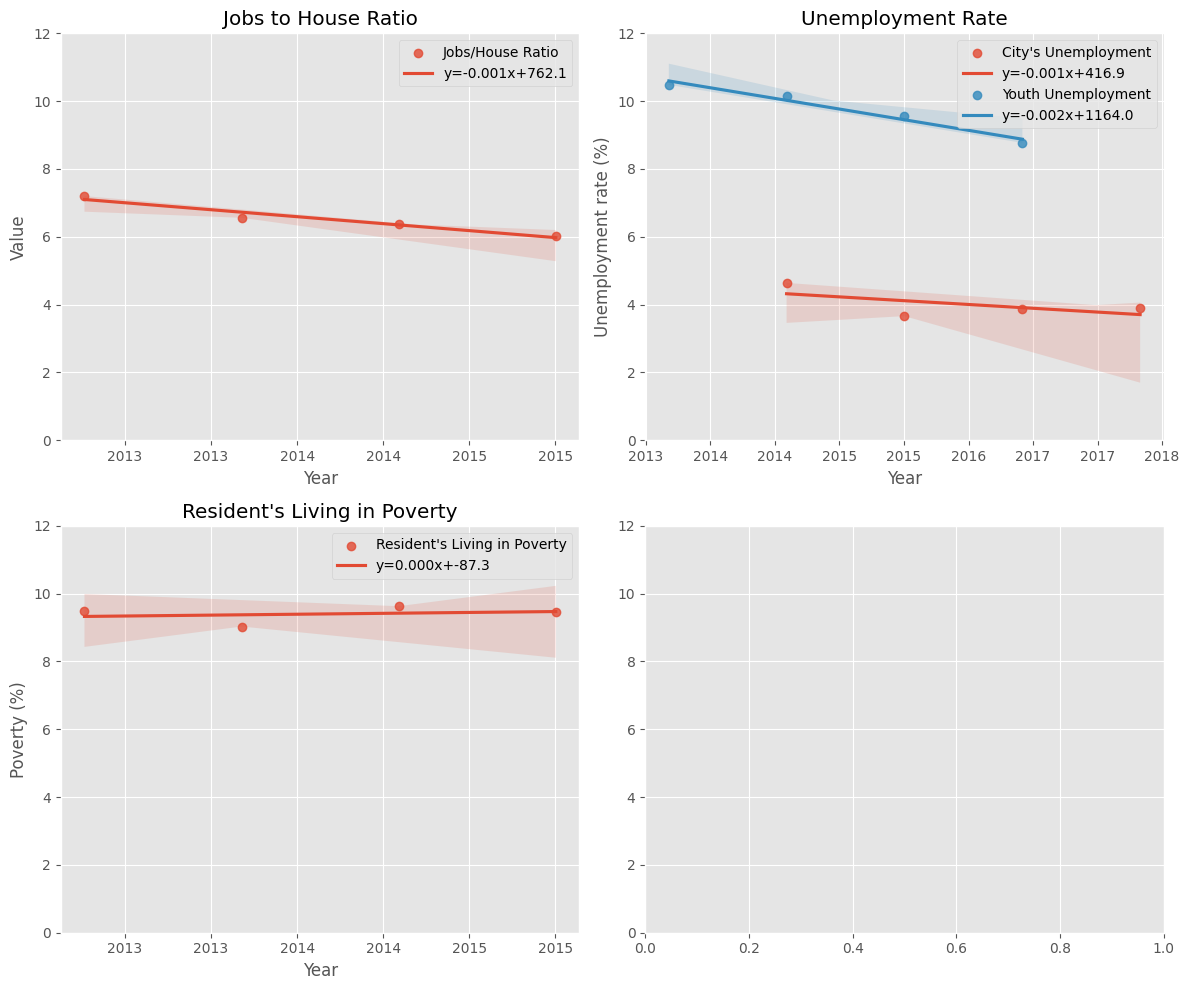

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Set the same y-axis limits for all subplots
y_min, y_max = 0, 12
for i, ax in enumerate(axes[:3].flat):
    ax.set_ylim(y_min, y_max)

#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(REC_5['period'].map(dt.datetime.toordinal),REC_5['value'])
#create linear regression model with seaborn
sns.regplot(x=mdates.date2num(REC_5['period']), y=REC_5['value'],ax=axes[0,0],label="Jobs/House Ratio",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#change date format to year
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[0,0].xaxis.set_major_formatter(date_format)
axes[0,0].set_title("Jobs to House Ratio")
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Value')
axes[0,0].legend()

#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(ECO_1['period'].map(dt.datetime.toordinal),ECO_1['value'])
#create linear regression model with seaborn
sns.regplot(x=mdates.date2num(ECO_1['period']), y=ECO_1['value'],ax=axes[0,1],label="City's Unemployment",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(ECO_5['period'].map(dt.datetime.toordinal),ECO_5['value'])
sns.regplot(x=mdates.date2num(ECO_5['period']), y=ECO_5['value'],ax=axes[0,1],label="Youth Unemployment",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#change date format to year
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[0,1].xaxis.set_major_formatter(date_format)
axes[0,1].set_title("Unemployment Rate")
axes[0,1].set_xlabel('Year')
axes[0,1].legend()
axes[0,1].set_ylabel('Unemployment rate (%)')

#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(ECO_3['period'].map(dt.datetime.toordinal),ECO_3['value'])
#create linear regression model with seaborn
sns.regplot(x=mdates.date2num(ECO_3['period']), y=ECO_3['value'],ax=axes[1,0],label="Resident's Living in Poverty",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#change date format to year
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[1,0].xaxis.set_major_formatter(date_format)
axes[1,0].set_title("Resident's Living in Poverty")
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Poverty (%)')
axes[1,0].legend()
# Adjust layout spacing between subplots
plt.tight_layout()
#show plot
plt.show()

<h4>Jobs to House Ratio:</h4>
The observed decline in the Jobs-to-House ratio suggests a positive trend, as lower ratios are generally desirable. However, it is noteworthy that, as of 2015, the Jobs-to-House ratio remains considerably high, reaching approximately 6. This high ratio indicates a significant number of workers commuting to urban centers, which can result in increased congestion and commuting times.

<h4>Unemployment Rate:</h4>
The current unemployment rate, standing at approximately 4%, aligns well with Australia's targeted unemployment range of 3.5% to 4.5%. Notably, there is a discernible downward trend in Youth Unemployment (age 15-24), which is a positive development. In 2017, Australia faced a notable challenge with a youth unemployment rate of around 14%. Consequently, Melbourne's current youth unemployment rate, hovering at approximately 9%, is a favorable indicator, reflecting an improvement in employment opportunities for the younger demographic.

<h4>Resident's Living in Poverty</h4>
The rate of poverty among residents in the City of Melbourne has demonstrated a persistent stability, hovering at approximately 9.5%. Ideally, we would observe a downward trajectory in this figure. Presently, it is worth noting that the City of Melbourne has not met the poverty reduction target set by the United Nations' Sustainable Development Goals, which aims for a poverty rate of 8.7%, as of the year 2017. Addressing this challenge and working towards achieving the UN's target should remain a priority for the city.


<h2><div class="usecase-section-header">2. Access to Healthcare</div></h2>

In [11]:
#Grab the necessary rows and values
health_df = ind_wellbeing[ind_wellbeing["indicator_label"] == "Health"]
quality_male = ind_wellbeing[ind_wellbeing["indicator_label"] == "Quality of life (Male)"]
quality_female = ind_wellbeing[ind_wellbeing["indicator_label"] == "Quality of life (Female)"]

#Number of physicians per 100,000
HEA_2 = liveability_df[liveability_df["id"] == "HEA_2"]
HEA_2 = HEA_2.sort_values(by=["period"])

#Number of nursing and midwifery per 100,000
HEA_4 = liveability_df[liveability_df["id"] == "HEA_4"]
HEA_4 = HEA_4.sort_values(by=["period"])

#Number of mental health practitioners per 100,000
HEA_5 = liveability_df[liveability_df["id"] == "HEA_5"]
HEA_5 = HEA_5.sort_values(by=["period"])

#Total population of city
PROP_1 = liveability_df[liveability_df["id"] == "PROP_1"]
PROP_1 = PROP_1.sort_values(by=["period"])

In [12]:
#unpivot from wide to long format
quality_male = pd.melt(quality_male, id_vars=['indicator_label'],var_name='Year',value_name="Value")
#select correct rows
quality_male = quality_male.loc[2:6]

#unpivot from wide to long format
health_df = pd.melt(health_df, id_vars=['indicator_label'],var_name='Year',value_name="Value")
#select correct rows
health_df = health_df.loc[2:6]

#unpivot from wide to long format
quality_female = pd.melt(quality_female, id_vars=['indicator_label'],var_name='Year',value_name="Value")
#select correct rows
quality_female = quality_female.loc[2:6]

In [13]:
#convert the year columns to datetime and values to floats
health_df = datetime_to_float(health_df)
quality_male = datetime_to_float(quality_male)
quality_female = datetime_to_float(quality_female)

In [14]:
#remove the June qtr from year
remove_30june(PROP_1)
# Convert the date_column to datetime
PROP_1['period'] = pd.to_datetime(PROP_1['period'])
# Extract the year and create a new column
PROP_1['period'] = PROP_1['period'].dt.year
# Filter for years 2015-2017
PROP_1_year = PROP_1[(PROP_1['period'] >= 2015) & (PROP_1['period'] <= 2017)]
# Select 'period' and 'value' columns
PROP_1_year = PROP_1_year[['period', 'value']]

# Convert the date_column to datetime
HEA_2['period'] = pd.to_datetime(HEA_2['period'])
# Extract the year and create a new column
HEA_2['period'] = HEA_2['period'].dt.year
# Filter for years 2015-2017
HEA_2_year = HEA_2[(HEA_2['period'] >= 2015) & (HEA_2['period'] <= 2017)]
# Select 'period' and 'value' columns
HEA_2_year = HEA_2_year[['period', 'value']]

# Convert the date_column to datetime
HEA_4['period'] = pd.to_datetime(HEA_4['period'])
# Extract the year and create a new column
HEA_4['period'] = HEA_4['period'].dt.year
# Filter for years 2015-2017
HEA_4_year = HEA_4[(HEA_4['period'] >= 2015) & (HEA_4['period'] <= 2017)]
# Select 'period' and 'value' columns
HEA_4_year = HEA_4_year[['period', 'value']]

# Convert the date_column to datetime
HEA_5['period'] = pd.to_datetime(HEA_5['period'])
# Extract the year and create a new column
HEA_5['period'] = HEA_5['period'].dt.year
# Filter for years 2015-2017
HEA_5_year = HEA_5[(HEA_5['period'] >= 2015) & (HEA_5['period'] <= 2017)]
# Select 'period' and 'value' columns
HEA_5_year = HEA_5_year[['period', 'value']]

In [15]:
#concantenate our selected rows together to form the ratios
physician_pop_ratio = conc_average(HEA_2_year,PROP_1_year)
nursing_pop_ratio = conc_average(HEA_4_year,PROP_1_year)
mental_pop_ratio = conc_average(HEA_5_year,PROP_1_year)

#convert the ratios period column to datetime
physician_pop_ratio['period'] = pd.to_datetime(physician_pop_ratio['period'], format='%Y')
nursing_pop_ratio['period'] = pd.to_datetime(nursing_pop_ratio['period'], format='%Y')
mental_pop_ratio['period'] = pd.to_datetime(mental_pop_ratio['period'], format='%Y')

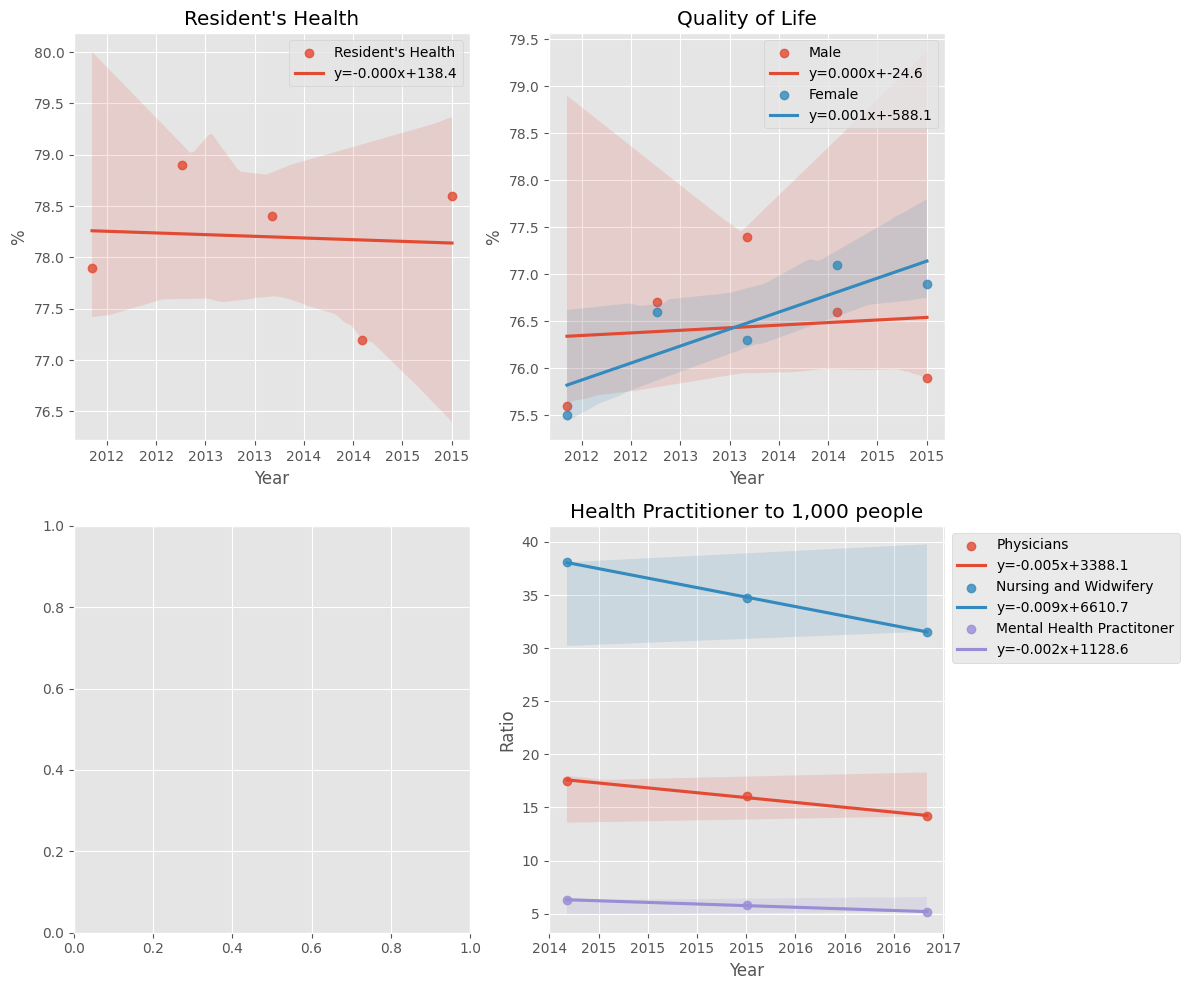

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(health_df['Year'].map(dt.datetime.toordinal),health_df['Value'])
#create linear regression model with seaborn
sns.regplot(x=mdates.date2num(health_df['Year']), y=health_df['Value'],ax=axes[0,0],label="Resident's Health",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[0,0].xaxis.set_major_formatter(date_format)
axes[0,0].set_title("Resident's Health")
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('%')
axes[0,0].legend(bbox_to_anchor=(1, 1))

#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(quality_male['Year'].map(dt.datetime.toordinal),quality_male['Value'])
sns.regplot(x=mdates.date2num(quality_male['Year']), y=quality_male['Value'],ax=axes[0,1],label="Male",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(quality_female['Year'].map(dt.datetime.toordinal),quality_female['Value'])
sns.regplot(x=mdates.date2num(quality_female['Year']), y=quality_female['Value'],ax=axes[0,1],label="Female",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[0,1].xaxis.set_major_formatter(date_format)
axes[0,1].set_title("Quality of Life")
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('%')
axes[0,1].legend(bbox_to_anchor=(1, 1))

#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(physician_pop_ratio['period'].map(dt.datetime.toordinal),physician_pop_ratio['value'])
sns.regplot(x=mdates.date2num(physician_pop_ratio['period']), y=physician_pop_ratio['value'],ax=axes[1,1],label="Physicians",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(nursing_pop_ratio['period'].map(dt.datetime.toordinal),nursing_pop_ratio['value'])
sns.regplot(x=mdates.date2num(nursing_pop_ratio['period']), y=nursing_pop_ratio['value'],ax=axes[1,1],label="Nursing and Widwifery",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(mental_pop_ratio['period'].map(dt.datetime.toordinal),mental_pop_ratio['value'])
sns.regplot(x=mdates.date2num(mental_pop_ratio['period']), y=mental_pop_ratio['value'],ax=axes[1,1],label="Mental Health Practitoner",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#change date format to year
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[1,1].xaxis.set_major_formatter(date_format)
axes[1,1].set_title("Health Practitioner to 1,000 people")
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Ratio')
axes[1,1].legend(bbox_to_anchor=(1, 1))
# Adjust layout spacing between subplots
plt.tight_layout()
#show plot
plt.show()

<h4>Resident's Health:</h4>
There is a no discernable change in Resident's Health which is less than ideal. Ideally, it would be increasing overtime.

<h4>Quality of Life:</h4>
The quality of life for males remain stagnant while for females there is a discernable increase.  

<h4>Health Practitioner to Population Ratio</h4>
In recent years, there has been a notable and consistent decrease in the number of mental health practitioners, a development that carries significant importance, particularly in the context of the COVID-19 pandemic. In 2016, it was reported that a substantial proportion, approximately 24.5%, of adults in Victoria had received diagnoses of depression or anxiety from medical professionals. Furthermore, negative trends are emerging in the fields of physician and nursing and midwifery staff, which bode poorly for the Victorian healthcare system.

<h2><div class="usecase-section-header">3. Food Security</div></h2>

In [17]:
#Grab the necessary rows and values
food_male = ind_wellbeing[ind_wellbeing["indicator_label"] == "Food security - running out (Male)"]
food_female = ind_wellbeing[ind_wellbeing["indicator_label"] == "Food security - running out (Female)"]

food_18 = ind_wellbeing[ind_wellbeing["indicator_label"] == "Food security - running out (18-35 yrs)"]
food_36 = ind_wellbeing[ind_wellbeing["indicator_label"] == "Food security - running out (36 yrs and over)"]

#unpivot from wide to long format
food_male = pd.melt(food_male, id_vars=['indicator_label'],var_name='Year',value_name="Value")
#select correct rows
food_male = food_male.loc[2:6]

#unpivot from wide to long format
food_female = pd.melt(food_female, id_vars=['indicator_label'],var_name='Year',value_name="Value")
#select correct rows
food_female = food_female.loc[2:6]

#unpivot from wide to long format
food_18 = pd.melt(food_18, id_vars=['indicator_label'],var_name='Year',value_name="Value")
#select correct rows
food_18 = food_18.loc[2:6]

#unpivot from wide to long format
food_36 = pd.melt(food_36, id_vars=['indicator_label'],var_name='Year',value_name="Value")
#select correct rows
food_36 = food_36.loc[2:6]

#convert the year columns to datetime and values to floats
food_male = datetime_to_float(food_male)
food_female = datetime_to_float(food_female)
food_18 = datetime_to_float(food_18)
food_36 = datetime_to_float(food_36)

FOOD_1 = liveability_df[liveability_df["id"] == "FOOD_1"]
#sort the datetime by ascending
FOOD_1 = FOOD_1.sort_values(by=["period"])
# Convert the date column to datetime to year format
FOOD_1['period'] = pd.to_datetime(FOOD_1['period'], format='%Y')

FOOD_2 = liveability_df[liveability_df["id"] == "FOOD_2"]
#sort the datetime by ascending
FOOD_2 = FOOD_2.sort_values(by=["period"])
# Convert the date column to datetime to year format
FOOD_2['period'] = pd.to_datetime(FOOD_2['period'], format='%Y')

FOOD_3 = liveability_df[liveability_df["id"] == "FOOD_3"]
#sort the datetime by ascending
FOOD_3 = FOOD_3.sort_values(by=["period"])
# Convert the date column to datetime to year format
FOOD_3['period'] = pd.to_datetime(FOOD_3['period'], format='%Y')

FOOD_4 = liveability_df[liveability_df["id"] == "FOOD_4"]
#sort the datetime by ascending
FOOD_4 = FOOD_4.sort_values(by=["period"])
# Convert the date column to datetime to year format
FOOD_4['period'] = pd.to_datetime(FOOD_4['period'], format='%Y')

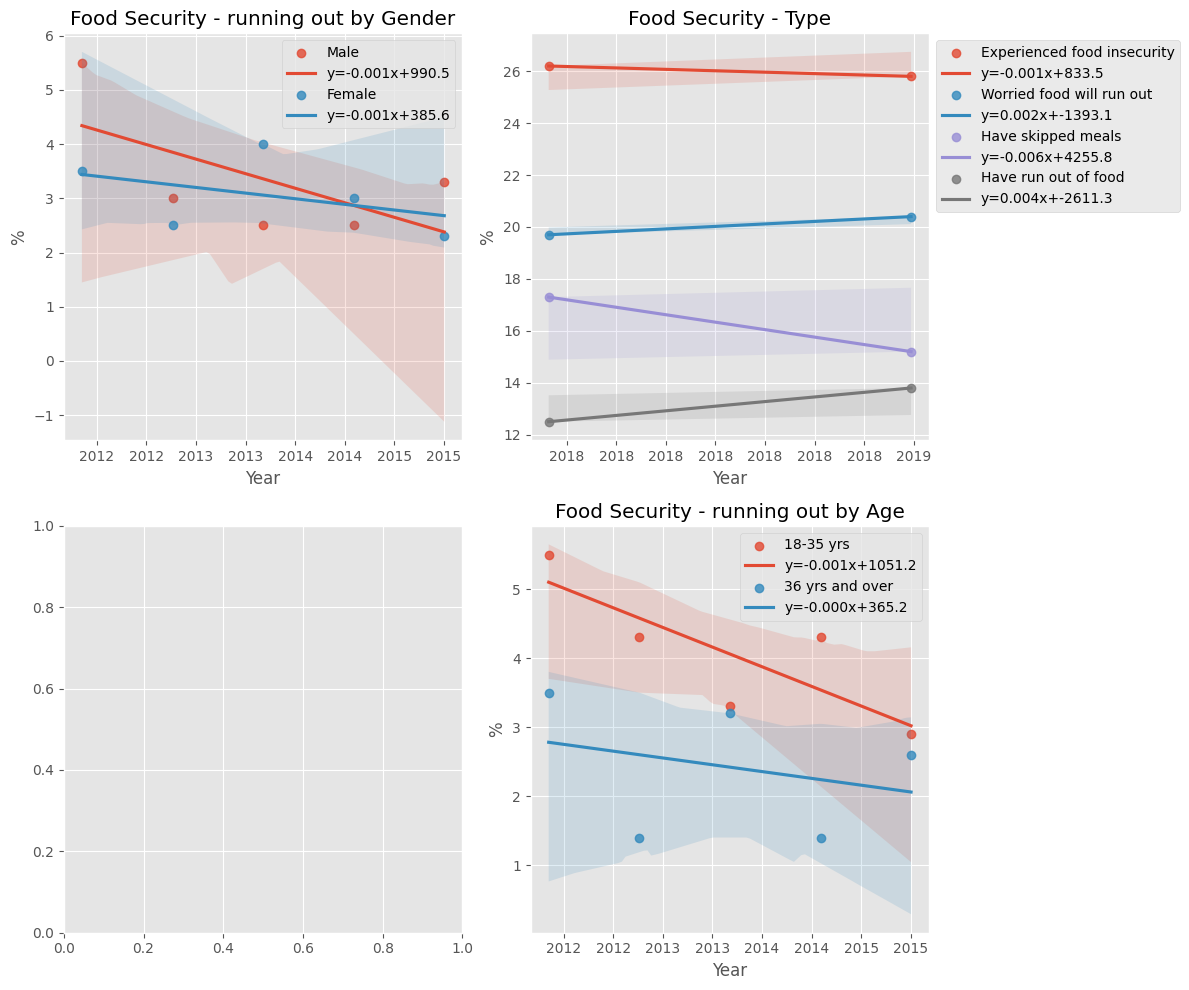

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(food_male['Year'].map(dt.datetime.toordinal),food_male['Value'])
#create linear regression model with seaborn
sns.regplot(x=mdates.date2num(food_male['Year']), y=food_male['Value'],ax=axes[0,0],label="Male",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(food_female['Year'].map(dt.datetime.toordinal),food_female['Value'])
sns.regplot(x=mdates.date2num(food_female['Year']), y=food_female['Value'],ax=axes[0,0],label="Female",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[0,0].xaxis.set_major_formatter(date_format)
axes[0,0].set_title("Food Security - running out by Gender")
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('%')
axes[0,0].legend(bbox_to_anchor=(1, 1))

#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(FOOD_1['period'].map(dt.datetime.toordinal),FOOD_1['value'])
#create linear regression model with seaborn
sns.regplot(x=mdates.date2num(FOOD_1['period']), y=FOOD_1['value'],ax=axes[0,1],label="Experienced food insecurity",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(FOOD_2['period'].map(dt.datetime.toordinal),FOOD_2['value'])
sns.regplot(x=mdates.date2num(FOOD_2['period']), y=FOOD_2['value'],ax=axes[0,1],label="Worried food will run out",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(FOOD_3['period'].map(dt.datetime.toordinal),FOOD_3['value'])
sns.regplot(x=mdates.date2num(FOOD_3['period']), y=FOOD_3['value'],ax=axes[0,1],label="Have skipped meals",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(FOOD_4['period'].map(dt.datetime.toordinal),FOOD_4['value'])
sns.regplot(x=mdates.date2num(FOOD_4['period']), y=FOOD_4['value'],ax=axes[0,1],label="Have run out of food",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[0,1].xaxis.set_major_formatter(date_format)
axes[0,1].set_title("Food Security - Type")
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('%')
axes[0,1].legend(bbox_to_anchor=(1, 1))

#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(food_18['Year'].map(dt.datetime.toordinal),food_18['Value'])
sns.regplot(x=mdates.date2num(food_18['Year']), y=food_18['Value'],ax=axes[1,1],label="18-35 yrs",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(food_36['Year'].map(dt.datetime.toordinal),food_36['Value'])
sns.regplot(x=mdates.date2num(food_36['Year']), y=food_36['Value'],ax=axes[1,1],label="36 yrs and over",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#change date format to year
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[1,1].xaxis.set_major_formatter(date_format)
axes[1,1].set_title("Food Security - running out by Age")
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('%')
axes[1,1].legend(bbox_to_anchor=(1, 1))
# Adjust layout spacing between subplots
plt.tight_layout()
#show plot
plt.show()

<h4>Food Security - Running out:</h4>
A positive observation is the evident decline in residents experiencing food shortages.

<h4>Food Security - Type:</h4>
On the whole, there appears to be a favorable trend, with a reduction in the number of individuals facing food insecurity (defined as insufficient access to safe and nourishing meals) and a decrease in instances of skipped meals. Nevertheless, it's important to highlight a slight uptick in concerns about the potential for food shortages, and, most notably, a slight increase in the number of people who have actually run out of food.

<h4>Food Security - Running out by Age </h4>
Thankfully, both age groups are experiencing a decline in instances of running out of food. However, it's worth noting that individuals aged 36 and above seem to be witnessing a more modest reduction in food shortages. Conversely, those in the 18-35 age bracket exhibit a higher percentage of experiencing food shortages, potentially attributed to their age and the challenges they face, such as limited job opportunities and financial constraints.

<div class="usecase-section-header">4. Community Connectedness</div>

In [19]:
#Grab the necessary rows and values
comm_total = ind_wellbeing[ind_wellbeing["indicator_label"] == "Community connectedness"]
comm_male = ind_wellbeing[ind_wellbeing["indicator_label"] == "Community connectedness (Male)"]
comm_female = ind_wellbeing[ind_wellbeing["indicator_label"] == "Community connectedness (Female)"]

comm_18_35 = ind_wellbeing[ind_wellbeing["indicator_label"] == "Community connectedness (18-35 yrs)"]
comm_36= ind_wellbeing[ind_wellbeing["indicator_label"] == "Community connectedness (36 yrs and over)"]

In [20]:
#unpivot from wide to long format
comm_total = pd.melt(comm_total, id_vars=['indicator_label'],var_name='Year',value_name="Value")
#select correct rows
comm_total = comm_total.loc[2:6]

#unpivot from wide to long format
comm_male = pd.melt(comm_male, id_vars=['indicator_label'],var_name='Year',value_name="Value")
#select correct rows
comm_male = comm_male.loc[2:6]

#unpivot from wide to long format
comm_female = pd.melt(comm_female, id_vars=['indicator_label'],var_name='Year',value_name="Value")
#select correct rows
comm_female = comm_female.loc[2:6]

#unpivot from wide to long format
comm_18_35 = pd.melt(comm_18_35, id_vars=['indicator_label'],var_name='Year',value_name="Value")
#select correct rows
comm_18_35 = comm_18_35.loc[2:6]

#unpivot from wide to long format
comm_36 = pd.melt(comm_36, id_vars=['indicator_label'],var_name='Year',value_name="Value")
#select correct rows
comm_36 = comm_36.loc[2:6]

#convert the year columns to datetime and values to floats
comm_total = datetime_to_float(comm_total)
comm_male = datetime_to_float(comm_male)
comm_female = datetime_to_float(comm_female)
comm_18_35 = datetime_to_float(comm_18_35)
comm_36 = datetime_to_float(comm_36)

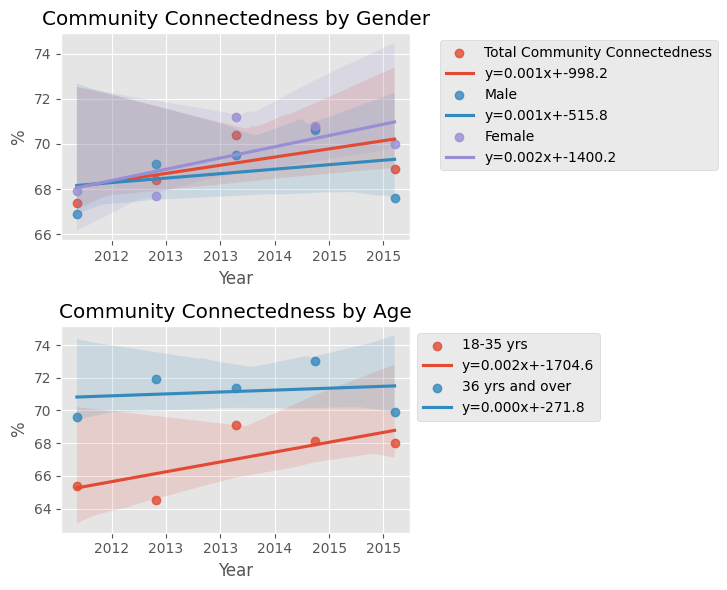

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 6))

#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(comm_total['Year'].map(dt.datetime.toordinal),comm_total['Value'])
#create linear regression model with seaborn
sns.regplot(x=mdates.date2num(comm_total['Year']), y=comm_total['Value'],ax=axes[0],label="Total Community Connectedness",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(comm_male['Year'].map(dt.datetime.toordinal),comm_male['Value'])
sns.regplot(x=mdates.date2num(comm_male['Year']), y=comm_male['Value'],ax=axes[0],label="Male",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(comm_female['Year'].map(dt.datetime.toordinal),comm_female['Value'])
sns.regplot(x=mdates.date2num(comm_female['Year']), y=comm_female['Value'],ax=axes[0],label="Female",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[0].xaxis.set_major_formatter(date_format)
axes[0].set_title("Community Connectedness by Gender")
axes[0].set_xlabel('Year')
axes[0].set_ylabel('%')
axes[0].legend(bbox_to_anchor=(1.9, 1))

#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(comm_18_35['Year'].map(dt.datetime.toordinal),comm_18_35['Value'])
#create linear regression model with seaborn
sns.regplot(x=mdates.date2num(comm_18_35["Year"]), y=comm_18_35["Value"],ax=axes[1],label="18-35 yrs",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(comm_36['Year'].map(dt.datetime.toordinal),comm_36['Value'])
sns.regplot(x=mdates.date2num(comm_36["Year"]), y=comm_36["Value"],ax=axes[1],label="36 yrs and over",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[1].xaxis.set_major_formatter(date_format)
axes[1].set_title("Community Connectedness by Age")
axes[1].set_xlabel('Year')
axes[1].set_ylabel('%')
axes[1].legend(bbox_to_anchor=(1, 1))

# Adjust layout spacing between subplots
plt.tight_layout()
#show plot
plt.show()

<h4>Community Connectedness</h4>
Gratifyingly, there is a marginal uptick in the overall sense of community connectedness, both for males and females. Notably, the age group of 18-35 years shows a more pronounced increase in community connectedness, although this might be attributed to their starting from a lower baseline percentage compared to those aged 36 years and over. In contrast, individuals aged 36 and over appear to maintain a relatively steady level of community connectedness when compared to the younger age group.

<h2><div class="usecase-section-header">5. Safety</div></h2>

In [22]:
safe_feel = ind_wellbeing[ind_wellbeing["indicator_label"] == "How safe you feel"]
#unpivot from wide to long format
safe_feel = pd.melt(safe_feel, id_vars=['indicator_label'],var_name='Year',value_name="Value")
#select correct rows
safe_feel = safe_feel.loc[2:6]
#convert the year columns to datetime and values to floats
safe_feel = datetime_to_float(safe_feel)

safe_feel_male = ind_wellbeing[ind_wellbeing["indicator_label"] == "How safe you feel (Male)"]
#unpivot from wide to long format
safe_feel_male = pd.melt(safe_feel_male, id_vars=['indicator_label'],var_name='Year',value_name="Value")
#select correct rows
safe_feel_male = safe_feel_male.loc[2:6]
#convert the year columns to datetime and values to floats
safe_feel_male = datetime_to_float(safe_feel_male)

safe_feel_female = ind_wellbeing[ind_wellbeing["indicator_label"] == "How safe you feel (Female)"]
#unpivot from wide to long format
safe_feel_female = pd.melt(safe_feel_female, id_vars=['indicator_label'],var_name='Year',value_name="Value")
#select correct rows
safe_feel_female = safe_feel_female.loc[2:6]
#convert the year columns to datetime and values to floats
safe_feel_female = datetime_to_float(safe_feel_female)

safe_day_18 = ind_wellbeing[ind_wellbeing["indicator_label"] == "Perceptions of safety - daytime (18-39 yrs)"]
#unpivot from wide to long format
safe_day_18 = pd.melt(safe_day_18, id_vars=['indicator_label'],var_name='Year',value_name="Value")
#select correct rows
safe_day_18 = safe_day_18.loc[4:6]
#convert the year columns to datetime and values to floats
safe_day_18 = datetime_to_float(safe_day_18)

safe_night_18 = ind_wellbeing[ind_wellbeing["indicator_label"] == "Perceptions of safety - night time (18-39 yrs)"]
#unpivot from wide to long format
safe_night_18 = pd.melt(safe_night_18, id_vars=['indicator_label'],var_name='Year',value_name="Value")
#select correct rows
safe_night_18 = safe_night_18.loc[4:6]
#convert the year columns to datetime and values to floats
safe_night_18 = datetime_to_float(safe_night_18)

safe_day_40 = ind_wellbeing[ind_wellbeing["indicator_label"] == "Perceptions of safety - daytime (40 yrs and over)"]
#unpivot from wide to long format
safe_day_40 = pd.melt(safe_day_40, id_vars=['indicator_label'],var_name='Year',value_name="Value")
#select correct rows
safe_day_40 = safe_day_40.loc[4:6]
#convert the year columns to datetime and values to floats
safe_day_40 = datetime_to_float(safe_day_40)

safe_night_40 = ind_wellbeing[ind_wellbeing["indicator_label"] == "Perceptions of safety - night time (40 yrs and over)"]
#unpivot from wide to long format
safe_night_40 = pd.melt(safe_night_40, id_vars=['indicator_label'],var_name='Year',value_name="Value")
#select correct rows
safe_night_40 = safe_night_40.loc[4:6]
#convert the year columns to datetime and values to floats
safe_night_40 = datetime_to_float(safe_night_40)

safe_day_female = ind_wellbeing[ind_wellbeing["indicator_label"] == "Perceptions of safety - daytime (Female)"]
#unpivot from wide to long format
safe_day_female = pd.melt(safe_day_female, id_vars=['indicator_label'],var_name='Year',value_name="Value")
#select correct rows
safe_day_female = safe_day_female.loc[4:6]
#convert the year columns to datetime and values to floats
safe_day_female = datetime_to_float(safe_day_female)

safe_night_female = ind_wellbeing[ind_wellbeing["indicator_label"] == "Perceptions of safety - night time (Female)"]
#unpivot from wide to long format
safe_night_female = pd.melt(safe_night_female, id_vars=['indicator_label'],var_name='Year',value_name="Value")
#select correct rows
safe_night_female = safe_night_female.loc[4:6]
safe_night_female = datetime_to_float(safe_night_female)

safe_day_male = ind_wellbeing[ind_wellbeing["indicator_label"] == "Perceptions of safety - daytime (Male)"]
#unpivot from wide to long format
safe_day_male = pd.melt(safe_day_male, id_vars=['indicator_label'],var_name='Year',value_name="Value")
#select correct rows
safe_day_male = safe_day_male.loc[4:6]
#convert the year columns to datetime and values to floats
safe_day_male = datetime_to_float(safe_day_male)

safe_night_male = ind_wellbeing[ind_wellbeing["indicator_label"] == "Perceptions of safety - night time (Male)"]
#unpivot from wide to long format
safe_night_male = pd.melt(safe_night_male, id_vars=['indicator_label'],var_name='Year',value_name="Value")
#select correct rows
safe_night_male = safe_night_male.loc[4:6]
#convert the year columns to datetime and values to floats
safe_night_male = datetime_to_float(safe_night_male)

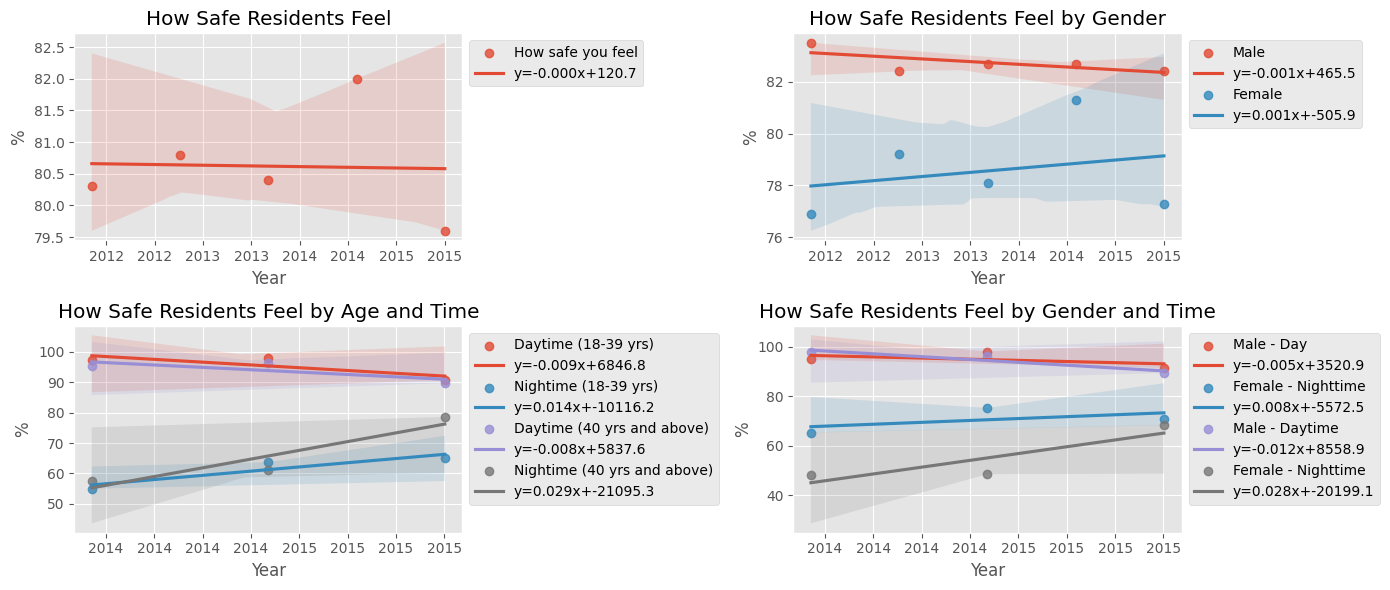

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(safe_feel['Year'].map(dt.datetime.toordinal),safe_feel['Value'])
#create linear regression model with seaborn
sns.regplot(x=mdates.date2num(safe_feel['Year']), y=safe_feel['Value'],ax=axes[0,0],label="How safe you feel",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[0,0].xaxis.set_major_formatter(date_format)
axes[0,0].set_title("How Safe Residents Feel")
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('%')
axes[0,0].legend(bbox_to_anchor=(1, 1))

#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(safe_feel_male['Year'].map(dt.datetime.toordinal),safe_feel_male['Value'])
#create linear regression model with seaborn
sns.regplot(x=mdates.date2num(safe_feel_male["Year"]), y=safe_feel_male["Value"],ax=axes[0,1],label="Male",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(safe_feel_female['Year'].map(dt.datetime.toordinal),safe_feel_female['Value'])
sns.regplot(x=mdates.date2num(safe_feel_female["Year"]), y=safe_feel_female["Value"],ax=axes[0,1],label="Female",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[0,1].xaxis.set_major_formatter(date_format)
axes[0,1].set_title("How Safe Residents Feel by Gender")
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('%')
axes[0,1].legend(bbox_to_anchor=(1, 1))

#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(safe_day_18['Year'].map(dt.datetime.toordinal),safe_day_18['Value'])
#create linear regression model with seaborn
sns.regplot(x=mdates.date2num(safe_day_18["Year"]), y=safe_day_18["Value"],ax=axes[1,0],label="Daytime (18-39 yrs)",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(safe_night_18['Year'].map(dt.datetime.toordinal),safe_night_18['Value'])
sns.regplot(x=mdates.date2num(safe_night_18["Year"]), y=safe_night_18["Value"],ax=axes[1,0],label="Nightime (18-39 yrs)",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(safe_day_40['Year'].map(dt.datetime.toordinal),safe_day_40['Value'])
#create linear regression model with seaborn
sns.regplot(x=mdates.date2num(safe_day_40["Year"]), y=safe_day_40["Value"],ax=axes[1,0],label="Daytime (40 yrs and above)",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(safe_night_40['Year'].map(dt.datetime.toordinal),safe_night_40['Value'])
sns.regplot(x=mdates.date2num(safe_night_40["Year"]), y=safe_night_40["Value"],ax=axes[1,0],label="Nightime (40 yrs and above)",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[1,0].xaxis.set_major_formatter(date_format)
axes[1,0].set_title("How Safe Residents Feel by Age and Time")
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('%')
axes[1,0].legend(bbox_to_anchor=(1, 1))

#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(safe_day_male['Year'].map(dt.datetime.toordinal),safe_day_male['Value'])
#create linear regression model with seaborn
sns.regplot(x=mdates.date2num(safe_day_male["Year"]), y=safe_day_male["Value"],ax=axes[1,1],label="Male - Day",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(safe_night_male['Year'].map(dt.datetime.toordinal),safe_night_male['Value'])
sns.regplot(x=mdates.date2num(safe_night_male["Year"]), y=safe_night_male["Value"],ax=axes[1,1],label="Female - Nighttime",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(safe_day_female['Year'].map(dt.datetime.toordinal),safe_day_female['Value'])
#create linear regression model with seaborn
sns.regplot(x=mdates.date2num(safe_day_female["Year"]), y=safe_day_female["Value"],ax=axes[1,1],label="Male - Daytime",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(safe_night_female['Year'].map(dt.datetime.toordinal),safe_night_female['Value'])
sns.regplot(x=mdates.date2num(safe_night_female["Year"]), y=safe_night_female["Value"],ax=axes[1,1],label="Female - Nighttime",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes[1,1].xaxis.set_major_formatter(date_format)
axes[1,1].set_title("How Safe Residents Feel by Gender and Time")
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('%')
axes[1,1].legend(bbox_to_anchor=(1, 1))

# Adjust layout spacing between subplots
plt.tight_layout()
#show plot
plt.show()

<h4>Safety</h4>
The overall safety situation has remained stable. However, upon closer inspection by gender, it becomes apparent that males have seen a decrease in safety, whereas females report an increase in their perception of safety. This distinction holds true when we differentiate between daytime and nighttime safety.

Furthermore, when analysing the data based on age groups, both cohorts exhibit a parallel pattern: a decline in safety ratings during daylight hours and an improvement during the nighttime.

In [24]:
FIRE_4 = liveability_df[liveability_df["id"] == "FIRE_4"]
#sort the datetime by ascending
FIRE_4 = FIRE_4.sort_values(by=["period"])

FIRE_5 = liveability_df[liveability_df["id"] == "FIRE_5"]
#sort the datetime by ascending
FIRE_5 = FIRE_5.sort_values(by=["period"])

FIRE_6 = liveability_df[liveability_df["id"] == "FIRE_6"]
#sort the datetime by ascending
FIRE_6 = FIRE_6.sort_values(by=["period"])

#format the date column to approrpiate format e.g. "2015" and convert to datetime
FIRE_4 = remove_FY(FIRE_4)
FIRE_5 = remove_FY(FIRE_5)
FIRE_6 = remove_FY(FIRE_6)

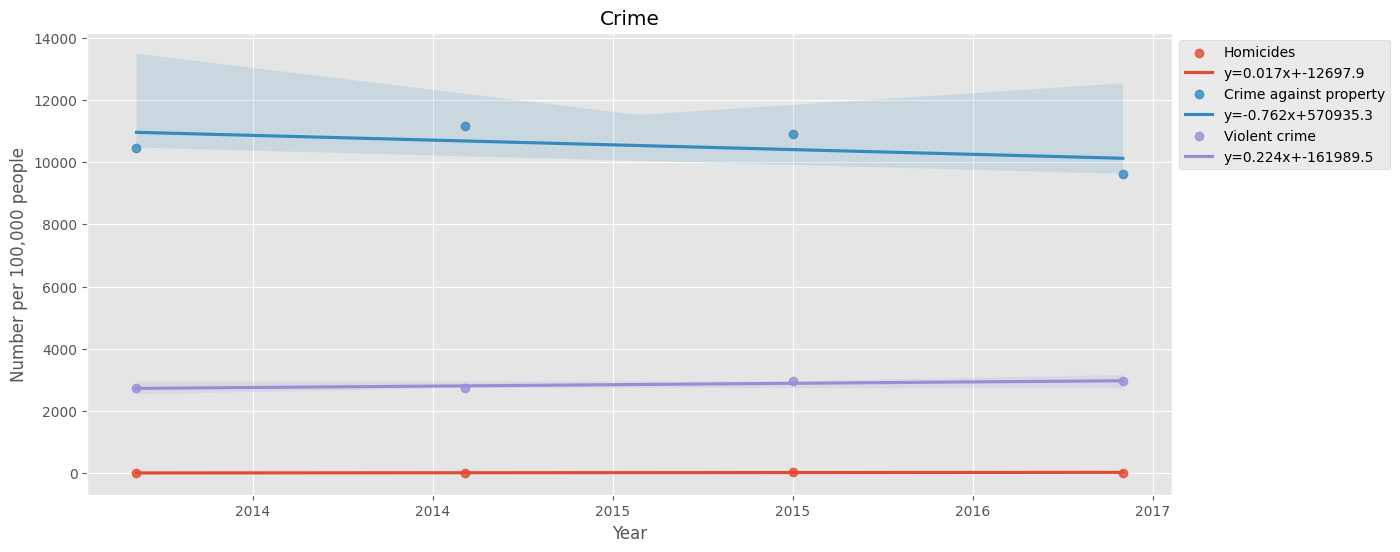

In [25]:
fig, axes = plt.subplots(figsize=(14, 6))

#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(FIRE_4['period'].map(dt.datetime.toordinal),FIRE_4['value'])
#create linear regression model with seaborn
sns.regplot(x=mdates.date2num(FIRE_4['period']), y=FIRE_4['value'],label="Homicides",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(FIRE_5['period'].map(dt.datetime.toordinal),FIRE_5['value'])
sns.regplot(x=mdates.date2num(FIRE_5['period']), y=FIRE_5['value'],label="Crime against property",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
#create linear regression equation for the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(FIRE_6['period'].map(dt.datetime.toordinal),FIRE_6['value'])
sns.regplot(x=mdates.date2num(FIRE_6['period']), y=FIRE_6['value'],label="Violent crime",line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
date_format = mdates.DateFormatter('%Y')  
#set date format to year
axes.xaxis.set_major_formatter(date_format)
axes.set_title("Crime")
axes.set_xlabel('Year')
axes.set_ylabel('Number per 100,000 people')
axes.legend(bbox_to_anchor=(1, 1))
plt.show()

<h4>Crime</h4>
Homicide rates show a slight upward trend, while incidents of violent crime are increasing at twice the rate of homicides. Encouragingly, property crime is witnessing a significant decline.

<h2><div class="usecase-section-header">6. Dwelling Density</div></h2>

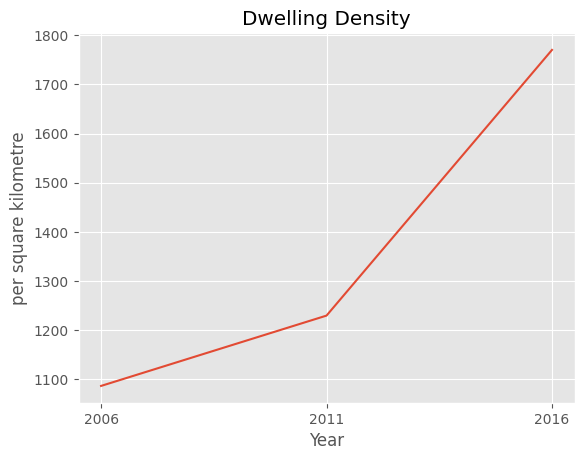

In [26]:
PROH_5 = liveability_df[liveability_df["id"] == "PROH_5"]
PROH_5 = PROH_5.sort_values(by=["period"])

plt.plot(PROH_5["period"],PROH_5["value"])
plt.title("Dwelling Density")
plt.xlabel("Year")
plt.ylabel("per square kilometre")
plt.show()

<h4>Dwelling Density</h4>
As of the Victorian Government's 2019 statement, their goal is to achieve a dwelling density of 25 dwellings per hectare, equivalent to 2500 dwellings per square kilometer. However, as of the latest available data from 2016, the dwelling density falls short of this target, currently standing at approximately 1800 dwellings per square kilometer.

<h1><div class="usecase-section-header">Conclusion & Recommendations</div></h1>

<h3><div class="usecase-section-header">Jobs</div></h3>
In an ideal scenario, achieving a Jobs-to-House ratio of approximately 1.5 is considered optimal. To strike this balance, strategic initiatives are necessary, including the relocation of job opportunities to suburban areas of Melbourne or the expansion of housing options within the city. These measures are designed to ease the burden on commuting infrastructure, alleviate traffic congestion, and enhance the overall quality of urban life.

Additionally, another approach worth exploring involves creating more job opportunities in suburban areas, particularly for lower-income individuals and those living in poverty. This approach not only contributes to improving the Jobs-To-House ratio but also holds the potential to decrease poverty rates in the region.

<h3><div class="usecase-section-header">Health</div></h3>
It's notable that, when examining the broader picture, the count of medical professionals, encompassing physicians, nurses, and midwives, appears to surpass the recommendations established by the World Health Organization (WHO). However, it's essential to recognise that this dataset may be somewhat skewed due to the predominant influence of Melbourne, a bustling metropolitan center. Consequently, residents in rural areas of Victoria may need to travel to the city for healthcare services, introducing significant variations in the health professional-to-patient ratio when considering the entire region.

Of concern is the fact that the number of healthcare practitioners is not keeping pace with the population growth in both Melbourne and Victoria. Addressing this issue may require collaborative efforts from the State and Federal governments. Strategies such as increasing the availability of visas for healthcare practitioners, subsidising health-related degrees, and implementing incentives for healthcare industry participation could be explored as potential solutions.

<h3><div class="usecase-section-header">Food Security</div></h3>
Thankfully, there is evidence to suggest that residents are experiencing a reduction in food insecurity. However, it's crucial to highlight a recent increase in concerns about potential food shortages. Notably, individuals in the 18-35 age group exhibit a higher prevalence of food insecurity compared to those aged 36 and above. Considering the ongoing economic challenges and the cost of living crisis, it's important to recognise that these results may not fully capture the current extent of concerns, which could be even more pronounced.

In light of these findings, it would be prudent to conduct a current survey of residents to gain a deeper understanding of prevailing trends. If necessary, addressing these trends could be accomplished through state support, potentially through initiatives like sponsoring food banks or implementing other economic strategies to bolster food security.

<h3><div class="usecase-section-header">Community Connectedness</div></h3>
A distinct upward trend in community connectedness is evident among both genders and across all age groups. Notably, the 18-35 age group starts with a slightly lower baseline of connectedness. One potential consideration for the City of Melbourne is to explore community initiatives tailored to this demographic. This could include sports-based activities or even venturing into the realm of esports to engage and enhance the sense of community among younger residents.

<h3><div class="usecase-section-header">Safety</div></h3>
Interestingly, there is an unexpected trend in the community's perception of safety, with a decline during the daytime and an improvement at night. Multiple factors may contribute to this phenomenon, and a thorough investigation is warranted. Conducting a survey to inquire about the reasons behind residents' feelings of insecurity could provide valuable insights.

One possible explanation could be an increase in violent crime, particularly during daylight hours, which may be influencing the daytime safety perception negatively.

<h3><div class="usecase-section-header">Dwelling Density</div></h3>
As of the year 2016, the City of Melbourne is not meeting the Victorian Government's target of achieving a dwelling density of 2500 dwellings per square kilometer. This discrepancy is particularly significant in the context of the persistent rental crisis and high housing prices. Therefore, it is strongly recommended that both the State and Federal governments join forces to collaborate on implementing measures designed to accelerate construction and streamline the development of high-density housing solutions.

<h3><div class="usecase-section-header">References</div></h3>
Kober, E. and Kober, E. (2023) The jobs–housing mismatch: What it means for U.S. metropolitan areas, Manhattan Institute. Available at: https://manhattan.institute/article/the-jobs-housing-mismatch-what-it-means-for-u-s-metropolitan-areas (Accessed: 15 September 2023). 

Nations, U. (no date) Goal 1: End poverty in all its forms everywhere - united nations sustainable development, United Nations. Available at: https://www.un.org/sustainabledevelopment/poverty/ (Accessed: 16 September 2023). 

Department of Health. Victoria, A. (2023) Mental illness and mental wellbeing, Department of Health. Victoria, Australia. Available at: https://www.health.vic.gov.au/your-health-report-of-the-chief-health-officer-victoria-2018/mental-health/mental-illness-and (Accessed: 17 September 2023). 

Organization, W.H. Skilled health professionals density (per 10 000 population), World Health Organization. Available at: https://www.who.int/data/gho/indicator-metadata-registry/imr-details/4667 (Accessed: 15 September 2023). 

Jafari, A., Singh, D. and Giles-Corti, B. (2023) Residential density and 20-minute neighbourhoods: A multi-neighbourhood destination location optimisation approach, Health &amp; Place. Available at: https://www.sciencedirect.com/science/article/pii/S1353829223001077#:~:text=Additionally%2C%20the%20Victorian%20Government%20clarified,et%20al.%2C%202017). (Accessed: 19 September 2023). 